# Algorithme génétique pour le problème du max-one

*nicolas.bredeche(at)upmc.fr (autre contributeur: Arthur Pajot, Paul Ecoffet)*

**UE 3i015**: *Introduction à l'Intelligence Artificielle et la Recherche Opérationelle*, L3, Sorbonne Univ.

Mise à jour: 
* 2017-03-20 - première version
* 2018-03-29 - ajout d'une représentation graphique, découpage en cellule

<!--`print()`-->

In [6]:
#!/usr/bin/env python

%matplotlib inline
%load_ext Cython

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as pl

import operator
import copy
import datetime 

from random import random, randint, sample

verbose = False


The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [7]:
# Graph-related functions

def plot(x,y,xMin,xMax,yMin,yMax):
    colors = "red" #np.random.rand(len(x))
    area = np.pi * (5 * np.ones(1))**2
    pl.xlim(xMin, xMax)
    pl.ylim(yMin, yMax)
    pl.scatter( np.asarray(x), np.asarray(y), s=area, c=colors, alpha=0.5)
    pl.show()
    
def plotIndividuals(datapop,xMin=0,xMax=1,yMin=0,yMax=1):
    xCoord = []
    yCoord = []
    
    for e in datapop:
        xCoord.append(e[0])
        yCoord.append(e[1])
    
    plot(xCoord,yCoord,xMin,xMax,yMin,yMax)

In [3]:
# Evolution-related functions

def evalue(individu):
    fitness = 0
    for e in individu:
        if e == 1:
            fitness = fitness + 1
    return fitness

def mute(individu,pMute):
    nouvelIndividu = []
    for e in individu:
        if random() < pMute:
            nouvelIndividu.append( (e + 1) % 2 )
        else:
            nouvelIndividu.append( e )
    return nouvelIndividu


In [4]:
#
# MAIN
#

def main():
    # stats

    if verbose == True:
        print "budget évaluation   :", evaluations
        print "nombre de paramètres:", tailleInd

        print ""
        print "taille population: ", taillePop
        print "taille tournoi: ", tailleTournoi
        print "P_mutation:", Pmutation
        print ""

    # initialisation des individus

    population = []

    for i in range(taillePop):
        individu = []
        for j in range(tailleInd):
            individu.append( randint(0,1) )
        population.append([individu,0]) # liste de tuple: N*(genome[],fitness)


    # boucle principale 

    it = 0
    stop = False # en cas de succès
    nbGen = 0

    data = []

    while it + taillePop <= evaluations and stop == False:

        if verbose == True:
            print "# Generation", nbGen,":",

        # évalue les individus, et mémorise le meilleur. Selection: (mu=1+4)-ES

        for individu in population:
            individu[1] = evalue(individu[0])

        # affiche la population

        meilleureFitness = 0
        meilleurIndividu = []
        for individu in population:
            #print individu[0],"- fitness: ",individu[1]
            if individu[1] > meilleureFitness:
                meilleureFitness = individu[1]
                meilleurIndividu = individu[:]
        if verbose == True:
            print ''.join(str(i) for i in meilleurIndividu[0]),"- fitness: ",meilleureFitness,"/",tailleInd

        data.append([it+taillePop,meilleureFitness])



        if meilleureFitness == tailleInd:
            if verbose == True:
                print "Succès!"
            stop = True
            break

        # construit une nouvelle population

        nouvellePopulation = []

        for i in range(taillePop):

            # sélectionne K individus (au hasard) pour le tournoi
            tournoi = sample(list(range(taillePop)),tailleTournoi) # renvoi les index de K individus parmis N

            # sélectionne le meilleur parmis les K individus (classe par ordre croissant, renvoi le dernier élément selon le fitness)
            parent = population[ sorted(tournoi, key=lambda x:population[x][1])[-1] ][0]

            # crée un nouvel individu par mutation de l'individu parent, et ajoute à la nouvelle population
            nouvelIndividu = mute(parent,Pmutation)
            nouvellePopulation.append([nouvelIndividu,0])

        # passe a la génération suivante

        population = nouvellePopulation[:]
        it = it + taillePop
        nbGen += 1

    # affichage

    plotIndividuals(data,0,evaluations,0,tailleInd)
    print "Meilleur solution:", meilleurIndividu


# Problème du max-one

**Données du problème**
* représentation: une solution candidate définie comme une suite finie de 0 et de 1 (ici: 30 valeurs)
* objectif: la fonction fitness calcule une distance de Hamming entre la solution candidate et la solution optimale (ici: l'objectif est artificiellement fixé comme une suite de 1)
* algorithme: algorithme génétique avec opérateur de mutation, sélection par tournoi
* le *nombre d'évaluation* et la *taille des individus* sont fixés. Ce sont des contraintes du problème.

**Degrés de liberté**
* les valeurs de la *taille de la population*, la *taille du tournoi*, et la *probabilité de mutation par gène* sont à choisir

**Exercice**
* modifiez et observez l'influence des valeurs de *taillePop*, *tailleTournoi* et *Pmutation* sur la vitesse de convergence. Attention, il s'agit d'une algorithme stochastique, donc deux exécutions peuvent mener à des résultats différents.


Problème MAX-ONE



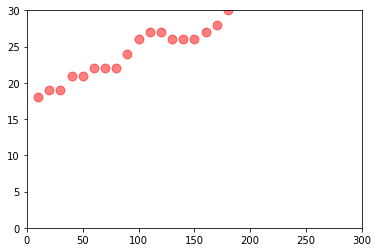

Meilleur solution: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 30]


In [15]:
print "\nProblème MAX-ONE\n"

# contraintes du problème (budget et représentation)

evaluations = 300
tailleInd = 30

# paramètres à régler (modifiable)

taillePop = 10
tailleTournoi = 8
Pmutation = 1.0/tailleInd

main()